In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

sns.set()
scale = StandardScaler()

In [2]:
data = pd.read_csv("C:/Users/satya/Downloads/Mall_Customers.csv")
data

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [4]:
data.duplicated().sum()

0

In [5]:
type(data)

pandas.core.frame.DataFrame

In [6]:
data.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual_Income_(k$)  Spending_Score
0             1    Male   19                  15              39
1             2    Male   21                  15              81
2             3  Female   20                  16               6
3             4  Female   23                  16              77
4             5  Female   31                  17              40
..          ...     ...  ...                 ...             ...
195         196  Female   35                 120              79
196         197  Female   45                 126              28
197         198    Male   32                 126              74
198         199    Male   32                 137              18
199         200    Male   30                 137              83

[200 rows x 5 columns]>

In [7]:
data.dtypes

CustomerID             int64
Genre                 object
Age                    int64
Annual_Income_(k$)     int64
Spending_Score         int64
dtype: object

In [8]:
scale.fit(data.drop('Genre', axis=1))

StandardScaler()

In [9]:
scaled_data = scale.transform(data.drop('Genre', axis=1))

In [10]:
scaled_data

array([[-1.7234121 , -1.42456879, -1.73899919, -0.43480148],
       [-1.70609137, -1.28103541, -1.73899919,  1.19570407],
       [-1.68877065, -1.3528021 , -1.70082976, -1.71591298],
       [-1.67144992, -1.13750203, -1.70082976,  1.04041783],
       [-1.6541292 , -0.56336851, -1.66266033, -0.39597992],
       [-1.63680847, -1.20926872, -1.66266033,  1.00159627],
       [-1.61948775, -0.27630176, -1.62449091, -1.71591298],
       [-1.60216702, -1.13750203, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.80493225, -1.58632148, -1.83237767],
       [-1.56752558, -0.6351352 , -1.58632148,  0.84631002],
       [-1.55020485,  2.02023231, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.27630176, -1.58632148,  1.89449216],
       [-1.5155634 ,  1.37433211, -1.54815205, -1.36651894],
       [-1.49824268, -1.06573534, -1.54815205,  1.04041783],
       [-1.48092195, -0.13276838, -1.54815205, -1.44416206],
       [-1.46360123, -1.20926872, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

In [11]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [12]:
new_scaled_data = pd.DataFrame(scaled_data, columns=data.drop('Genre', axis=1).columns)
new_scaled_data

,CustomerID,Age,Annual_Income_(k$),Spending_Score
0,-1.723412,-1.424569,-1.738999,-0.434801
1,-1.706091,-1.281035,-1.738999,1.195704
2,-1.688771,-1.352802,-1.700830,-1.715913
3,-1.671450,-1.137502,-1.700830,1.040418
4,-1.654129,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061
196,1.671450,0.441365,2.497807,-0.861839
197,1.688771,-0.491602,2.497807,0.923953
198,1.706091,-0.491602,2.917671,-1.250054


In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(4)
kmeans.fit(new_scaled_data)
new_scaled_data['clusters'] = kmeans.fit_predict(new_scaled_data)

C:\Users\satya\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\satya\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\satya\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\satya\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\satya\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

In [15]:
new_scaled_data

,CustomerID,Age,Annual_Income_(k$),Spending_Score,clusters
0,-1.723412,-1.424569,-1.738999,-0.434801,0
1,-1.706091,-1.281035,-1.738999,1.195704,0
2,-1.688771,-1.352802,-1.700830,-1.715913,0
3,-1.671450,-1.137502,-1.700830,1.040418,0
4,-1.654129,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...,...
195,1.654129,-0.276302,2.268791,1.118061,1
196,1.671450,0.441365,2.497807,-0.861839,3
197,1.688771,-0.491602,2.497807,0.923953,1
198,1.706091,-0.491602,2.917671,-1.250054,3


In [16]:
kmeans.inertia_

259.99019133963805

In [17]:
wcss = []
for i in range(1, 10):
    kmeans = KMeans(i)
    kmeans.fit(new_scaled_data)
    wcss.append(kmeans.inertia_)

wcss

C:\Users\satya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\satya\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

[1041.155,
 642.3720160670294,
 456.67505528487624,
 259.99019133963805,
 241.7699524052599,
 198.4579232330163,
 182.05435220092556,
 142.2145902057385,
 126.42787290147916]

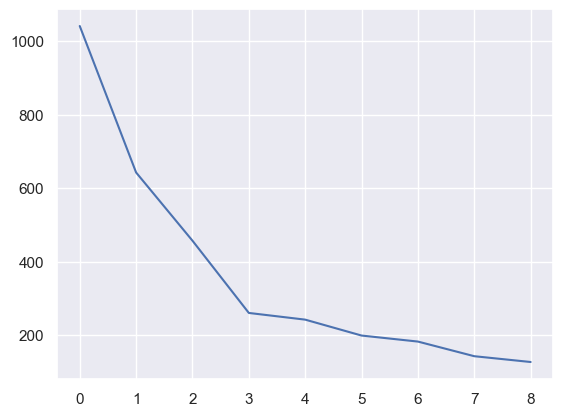

In [18]:
plt.plot(wcss)

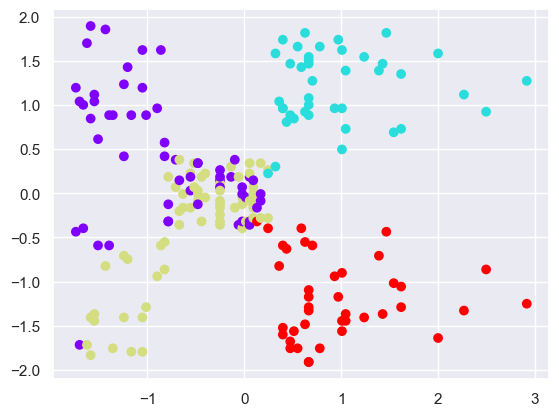

In [19]:
plt.scatter(new_scaled_data['Annual_Income_(k$)'], new_scaled_data['Spending_Score'], c=new_scaled_data['clusters'], cmap='rainbow')
plt.show()

In [20]:
new_scaled_data.columns

Index(['CustomerID', 'Age', 'Annual_Income_(k$)', 'Spending_Score',
       'clusters'],
      dtype='object')

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_with_pca = pca.fit_transform(new_scaled_data[['Age', 'Annual_Income_(k$)', 'Spending_Score']])
pca_data = pd.DataFrame(data_with_pca, columns=[["PCA1", "PCA2"]])
pca_data

,PCA1,PCA2
0,-0.615720,-1.763481
1,-1.665793,-1.820747
2,0.337862,-1.674799
3,-1.456573,-1.772430
4,-0.038465,-1.662740
...,...,...
195,-1.093705,2.215577
196,0.800448,2.540748
197,-1.119709,2.445169
198,0.395411,2.946665


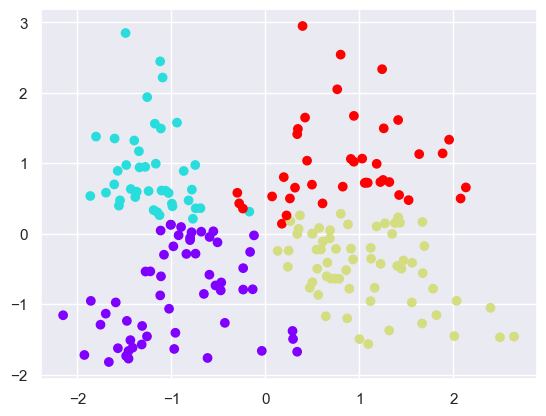

In [22]:
plt.scatter(pca_data['PCA1'], pca_data['PCA2'], c=new_scaled_data['clusters'], cmap='rainbow')
plt.show()